In [157]:
#import tensorflow as tf
from os import listdir,rename
from matplotlib import pyplot as plt
import numpy as np
from keras import *
from keras.layers import Conv2D,Conv3D, MaxPooling2D
from keras.models import Sequential
from pylab import *
import cv2
from os.path import isfile, join
from IPython.display import Image,display
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


c:\python\python interpreter\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['power', 'fft', 'linalg', 'info', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [158]:
path="D:/ML Papers HRS/LowtoHIGH/BICUBIC_525x350"
paths="D:/ML Papers HRS/LowtoHIGH/HIGH_525x350"
input_imgs = [f for f in listdir(path) if isfile(join(path, f))]
output_imgs = [f for f in listdir(paths) if isfile(join(paths, f))]
input_imgs[0]

'1.jpg'

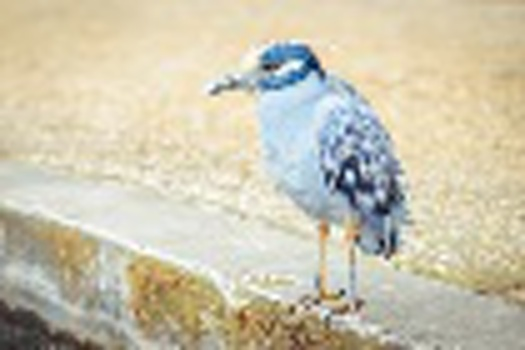

(5000,)
(5000,)
(5000, 1)


In [159]:
display(Image(filename=path+"/"+input_imgs[2]))
print(shape(input_imgs))
input_imgs=np.array(input_imgs)
print(shape(input_imgs))
input_imgs=input_imgs[:,None]
print(shape(input_imgs))

In [164]:
input_imgs[0]

array(['1.jpg'],
      dtype='<U8')

['1.jpg']


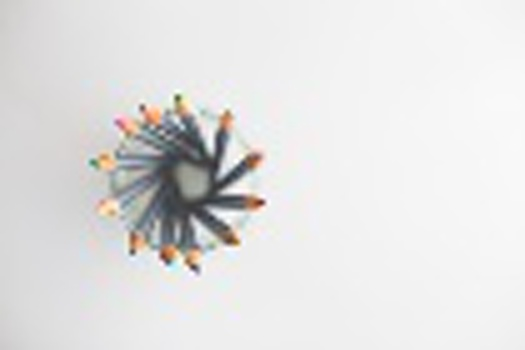

In [165]:
print(input_imgs[0])
display(Image(filename=path+"/"+input_imgs[0][0]))
#x=np.array(Image(filename=path+"/"+input_imgs[2][0]))
#x

'''
The following are the relationships between Y and R, between G and B, between U, R and luminance, and finally, between V, B and luminance:

    Y = 0.299R + 0.587 G + 0.114 B
    U = -0.147R - 0.289 G + 0.436B = 0.492(B - Y)
    V = 0.615R -0.515G -0.100B = 0.877(R-Y)
'''
The  transform is:7
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a4b1f4181139f827eb5cdb9eddadb95bac38b1ad">


In [260]:
img=input_imgs[0][0]
def give_yuv(img):
    x=imread(path+"/"+img)
    b,g,r=cv2.split(x)
    y=(16*256+65.738*r + 129.057*g  + 25.064*b)/256
    u=(128*256-37.945*r  -74.494*g  + 112.439*b)/256
    v=(128*256+112.439*r - 94.154*g  - 18.285*b)/256
    #imshow(y)
    p=[]
    cv2.imwrite("y.jpg",y)
    cv2.imwrite("u.jpg",u)
    cv2.imwrite("v.jpg",v)
    p=[y,u,v]
    #print(shape(p))
    return y,u,v
y,u,v=give_yuv(img)

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/adcfcba9ac4118f6d89f714c5a230e6441093240">

True

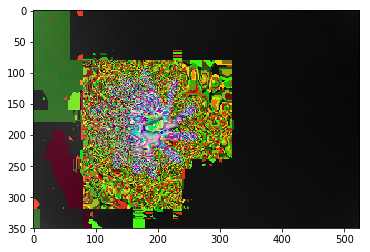

In [271]:
img=input_imgs[0][0]
def give_rgb(y,u,v):
    #y=yuv[0,:,:]
    #u=yuv[1,:,:]
    #v=yuv[2,:,:]
    #print(shape(yuv[0]))
    r=255*((y-16)/219 + 0.701*(v-128)/112)
    g=255*((y-16)/219-(0.886/112)*(0.114/0.587)*(u-128)/112-0.701*(0.299/0.587)*(v-128)/112)
    b=255*((y-16)/219+0.886*(u-128)/112)
    img1=[b,g,r]
    return img1

y,u,v=give_yuv(img)
rgb_image=give_rgb(y,u,v)
rgb_img = numpy.transpose(rgb_image, (1, 2, 0))
shape(rgb_img)
imshow(rgb_img)
cv2.imwrite("rgb1.jpg",rgb_img)

<class 'numpy.ndarray'>
(350, 525)


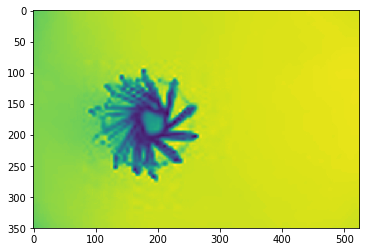

In [265]:

#plt.imshow(imread(input_imgs[3]))
#plt.show()
img=input_imgs[0][0]
def give_luminance(img):
    yub=cv2.cvtColor(cv2.imread(path+"/"+i),cv2.COLOR_BGR2YUV)
    #x=cv2.split(yub)
    print(type(yub))
    print(shape(y))
    imshow(y)
    #print(cv2.imread(path+"/"+i))
    #y = cv2.cvtColor(yub, cv2.COLOR_GRAY2BGR)
    #print(shape(y),shape(u),shape(v))
    imshow(y)
    
    return np.array(y)

f=give_luminance(img)

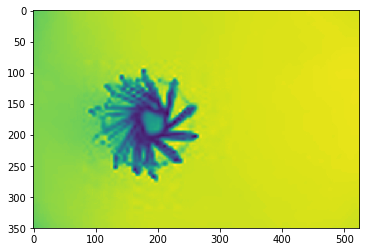

In [273]:
x=imread(path+"/"+input_imgs[133][0])
imshow(give_yuv(img)[0])

In [ ]:
model = Sequential()
model.add(Conv2D(12, kernel_size=(3, 3), kernel_initializer='glorot_uniform', bias_initializer='zeros',use_bias=True,strides=(1,1),activation='relu',padding="SAME",data_format="channels_last",input_shape=[350,525,3]))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(3, (3,3),padding="SAME",kernel_initializer='glorot_uniform', bias_initializer='zeros',use_bias=True, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))

class AccuracyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()
#inp=[cv2.imread(path+"/"+f) for f in listdir(path) if isfile(join(path, f)) ]
#out=[cv2.imread(paths+"/"+f) for f in listdir(paths) if isfile(join(paths, f)) ]
#print(inp[2])
'''
counter=0
for i in input_imgs:
    inp=give_yuv(input_imgs[counter][0])
    inp=inp[0]
    inp=inp[:,:,None]
    inp=inp[:,:,:,None]
    inp=numpy.transpose(inp, (2, 0, 1,3))
    counter=1+counter
    out=give_yuv(output_imgs[counter])
    out=out[0]
    out=out[:,:,None]
    out=out[:,:,:,None]
    out=numpy.transpose(out, (2, 0, 1,3))
    model.compile(loss=losses.mean_squared_error,optimizer=optimizers.Adam(),metrics=['accuracy'])
    model.fit(x=inp,y=out,batch_size=128,epochs=10,verbose=1, callbacks=[history])     
    
'''
counter=0
for i in input_imgs:
    inp=imread(path+"/"+input_imgs[counter][0])
    #inp=inp[0]
    #inp=inp[:,:,None]
    inp=inp[:,:,:,None]
    inp=numpy.transpose(inp, (3,0,1,2))
    counter=1+counter
    out=imread(paths+"/"+output_imgs[counter])
    #out=out[0]
    #out=out[:,:,None]
    out=out[:,:,:,None]
    out=numpy.transpose(out, (3,0,1,2))
    model.compile(loss=losses.mean_squared_error,optimizer=optimizers.Adam(),metrics=['accuracy'])
    model.fit(x=inp,y=out,batch_size=128,epochs=10,verbose=1, callbacks=[history])     

plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Epoch 1/10
1/1 [==============================] - 4s - loss: 14315.9658 - acc: 0.4084
Epoch 2/10
1/1 [==============================] - 0s - loss: 13582.7373 - acc: 0.4084
Epoch 3/10
1/1 [==============================] - 0s - loss: 12961.0371 - acc: 0.4084
Epoch 4/10
1/1 [==============================] - 0s - loss: 12291.9326 - acc: 0.4085
Epoch 5/10
1/1 [==============================] - 0s - loss: 11630.2842 - acc: 0.4086
Epoch 6/10
1/1 [==============================] - 0s - loss: 10956.4326 - acc: 0.4090
Epoch 7/10
1/1 [==============================] - 0s - loss: 10305.1055 - acc: 0.4091
Epoch 8/10
1/1 [==============================] - 0s - loss: 9685.9004 - acc: 0.4088
Epoch 9/10
1/1 [==============================] - 0s - loss: 9100.0000 - acc: 0.4082
Epoch 10/10
1/1 [==============================] - 0s - loss: 8551.1553 - acc: 0.4072
Epoch 1/10
1/1 [==============================] - 0s - loss: 18597.3340 - acc: 0.6744
Epoch 2/10
1/1 [==============================] - 0s - l

1/1 [==============================] - 0s - loss: 4239.7983 - acc: 0.1244
Epoch 7/10
1/1 [==============================] - 0s - loss: 4000.7151 - acc: 0.1489
Epoch 8/10
1/1 [==============================] - 0s - loss: 3838.9429 - acc: 0.2569
Epoch 9/10
1/1 [==============================] - 0s - loss: 3737.2468 - acc: 0.5680
Epoch 10/10
1/1 [==============================] - 0s - loss: 3687.8162 - acc: 0.6663
Epoch 1/10
1/1 [==============================] - 0s - loss: 3310.6924 - acc: 0.0357
Epoch 2/10
1/1 [==============================] - 0s - loss: 3121.5420 - acc: 0.0598
Epoch 3/10
1/1 [==============================] - 0s - loss: 2958.5913 - acc: 0.1206
Epoch 4/10
1/1 [==============================] - 0s - loss: 2820.0325 - acc: 0.4831
Epoch 5/10
1/1 [==============================] - 0s - loss: 2704.5227 - acc: 0.7725
Epoch 6/10
1/1 [==============================] - 0s - loss: 2609.2402 - acc: 0.8730
Epoch 7/10
1/1 [==============================] - 0s - loss: 2535.8555 - ac

1/1 [==============================] - 0s - loss: 16643.3848 - acc: 0.9080
Epoch 3/10
1/1 [==============================] - 0s - loss: 15603.8848 - acc: 0.9304
Epoch 4/10
1/1 [==============================] - 0s - loss: 14608.4883 - acc: 0.9450
Epoch 5/10
1/1 [==============================] - 0s - loss: 13714.9824 - acc: 0.9543
Epoch 6/10
1/1 [==============================] - 0s - loss: 12933.1016 - acc: 0.9609
Epoch 7/10
1/1 [==============================] - 0s - loss: 12344.3213 - acc: 0.9645
Epoch 8/10
1/1 [==============================] - 0s - loss: 11948.5488 - acc: 0.9672
Epoch 9/10
1/1 [==============================] - 0s - loss: 11750.1670 - acc: 0.9690
Epoch 10/10
1/1 [==============================] - 0s - loss: 11758.5752 - acc: 0.9705
Epoch 1/10
1/1 [==============================] - 0s - loss: 137123.3750 - acc: 0.9832
Epoch 2/10
1/1 [==============================] - 0s - loss: 115279.6484 - acc: 0.9831
Epoch 3/10
1/1 [==============================] - 0s - loss: 9

1/1 [==============================] - 0s - loss: 3513.7927 - acc: 0.6686
Epoch 8/10
1/1 [==============================] - 0s - loss: 3505.2029 - acc: 0.7578
Epoch 9/10
1/1 [==============================] - 0s - loss: 3507.3972 - acc: 0.8095
Epoch 10/10
1/1 [==============================] - 0s - loss: 3486.7642 - acc: 0.8381
Epoch 1/10
1/1 [==============================] - 1s - loss: 6058.4829 - acc: 0.0522
Epoch 2/10
1/1 [==============================] - 0s - loss: 5267.8149 - acc: 0.2850
Epoch 3/10
1/1 [==============================] - 0s - loss: 4638.8794 - acc: 0.6232
Epoch 4/10
1/1 [==============================] - 0s - loss: 4052.3894 - acc: 0.8462
Epoch 5/10
1/1 [==============================] - 0s - loss: 3527.4814 - acc: 0.9538
Epoch 6/10
1/1 [==============================] - 0s - loss: 3147.3015 - acc: 0.9523
Epoch 7/10
1/1 [==============================] - 0s - loss: 2917.4290 - acc: 0.9478
Epoch 8/10
1/1 [==============================] - 0s - loss: 2817.0505 - ac

1/1 [==============================] - 0s - loss: 7134.1455 - acc: 0.1036
Epoch 4/10
1/1 [==============================] - 0s - loss: 6633.4482 - acc: 0.1040
Epoch 5/10
1/1 [==============================] - 0s - loss: 6263.8657 - acc: 0.1045
Epoch 6/10
1/1 [==============================] - 0s - loss: 5986.8667 - acc: 0.1054
Epoch 7/10
1/1 [==============================] - 0s - loss: 5763.6479 - acc: 0.1082
Epoch 8/10
1/1 [==============================] - 0s - loss: 5569.8398 - acc: 0.1216
Epoch 9/10
1/1 [==============================] - 0s - loss: 5399.0410 - acc: 0.1736
Epoch 10/10
1/1 [==============================] - 0s - loss: 5256.8018 - acc: 0.2316
Epoch 1/10
1/1 [==============================] - 1s - loss: 7740.5977 - acc: 0.3165
Epoch 2/10
1/1 [==============================] - 0s - loss: 7377.6484 - acc: 0.3105
Epoch 3/10
1/1 [==============================] - 0s - loss: 7270.3643 - acc: 0.3493
Epoch 4/10
1/1 [==============================] - 0s - loss: 7135.3384 - ac

1/1 [==============================] - 0s - loss: 10773.8428 - acc: 0.3163
Epoch 10/10
1/1 [==============================] - 0s - loss: 10551.9707 - acc: 0.3300
Epoch 1/10
1/1 [==============================] - 1s - loss: 23703.4746 - acc: 0.4880
Epoch 2/10
1/1 [==============================] - 0s - loss: 17688.1895 - acc: 0.4871
Epoch 3/10
1/1 [==============================] - 0s - loss: 13595.2666 - acc: 0.4861
Epoch 4/10
1/1 [==============================] - 0s - loss: 9949.2627 - acc: 0.4840
Epoch 5/10
1/1 [==============================] - 0s - loss: 7243.7676 - acc: 0.4813
Epoch 6/10
1/1 [==============================] - 0s - loss: 5228.6973 - acc: 0.4839
Epoch 7/10
1/1 [==============================] - 0s - loss: 3819.2483 - acc: 0.5833
Epoch 8/10
1/1 [==============================] - 0s - loss: 2829.2700 - acc: 0.5833
Epoch 9/10
1/1 [==============================] - 0s - loss: 2221.2166 - acc: 0.5814
Epoch 10/10
1/1 [==============================] - 0s - loss: 1917.654

1/1 [==============================] - 0s - loss: 4179.4546 - acc: 0.2432
Epoch 6/10
1/1 [==============================] - 0s - loss: 3767.3074 - acc: 0.2408
Epoch 7/10
1/1 [==============================] - 0s - loss: 3377.2283 - acc: 0.2371
Epoch 8/10
1/1 [==============================] - 0s - loss: 3066.0466 - acc: 0.2317
Epoch 9/10
1/1 [==============================] - 0s - loss: 2860.6211 - acc: 0.2206
Epoch 10/10
1/1 [==============================] - 0s - loss: 2787.4290 - acc: 0.1995
Epoch 1/10
1/1 [==============================] - 1s - loss: 22071.8770 - acc: 0.5066
Epoch 2/10
1/1 [==============================] - 0s - loss: 21225.3750 - acc: 0.3134
Epoch 3/10
1/1 [==============================] - 0s - loss: 20664.3262 - acc: 0.1605
Epoch 4/10
1/1 [==============================] - 0s - loss: 20270.2227 - acc: 0.1181
Epoch 5/10
1/1 [==============================] - 0s - loss: 19917.4668 - acc: 0.1070
Epoch 6/10
1/1 [==============================] - 0s - loss: 19550.781

In [ ]:
x = tf.placeholder(tf.float32, shape=(None,525, 350,3))
y = tf.placeholder(tf.float32,shape(None,525,350,3))
w_conv1=tf.Variable(t)



